In [13]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectPercentile
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [14]:
%matplotlib inline

In [15]:
mpl.rcParams['figure.dpi'] = 400
mpl.rcParams['figure.figsize'] = [10, 6]
mpl.rcParams['axes.titlecolor'] = 'Grey'

### Gradiente descendente para a descoberta de valores se parâmetros ótimos

In [16]:
X_poly = np.linspace(-3, 5, 81)
print(X_poly[:5], '...' , X_poly[-5:])

[-3.  -2.9 -2.8 -2.7 -2.6] ... [4.6 4.7 4.8 4.9 5. ]


Text(0.0, 1.0, 'Error surface')

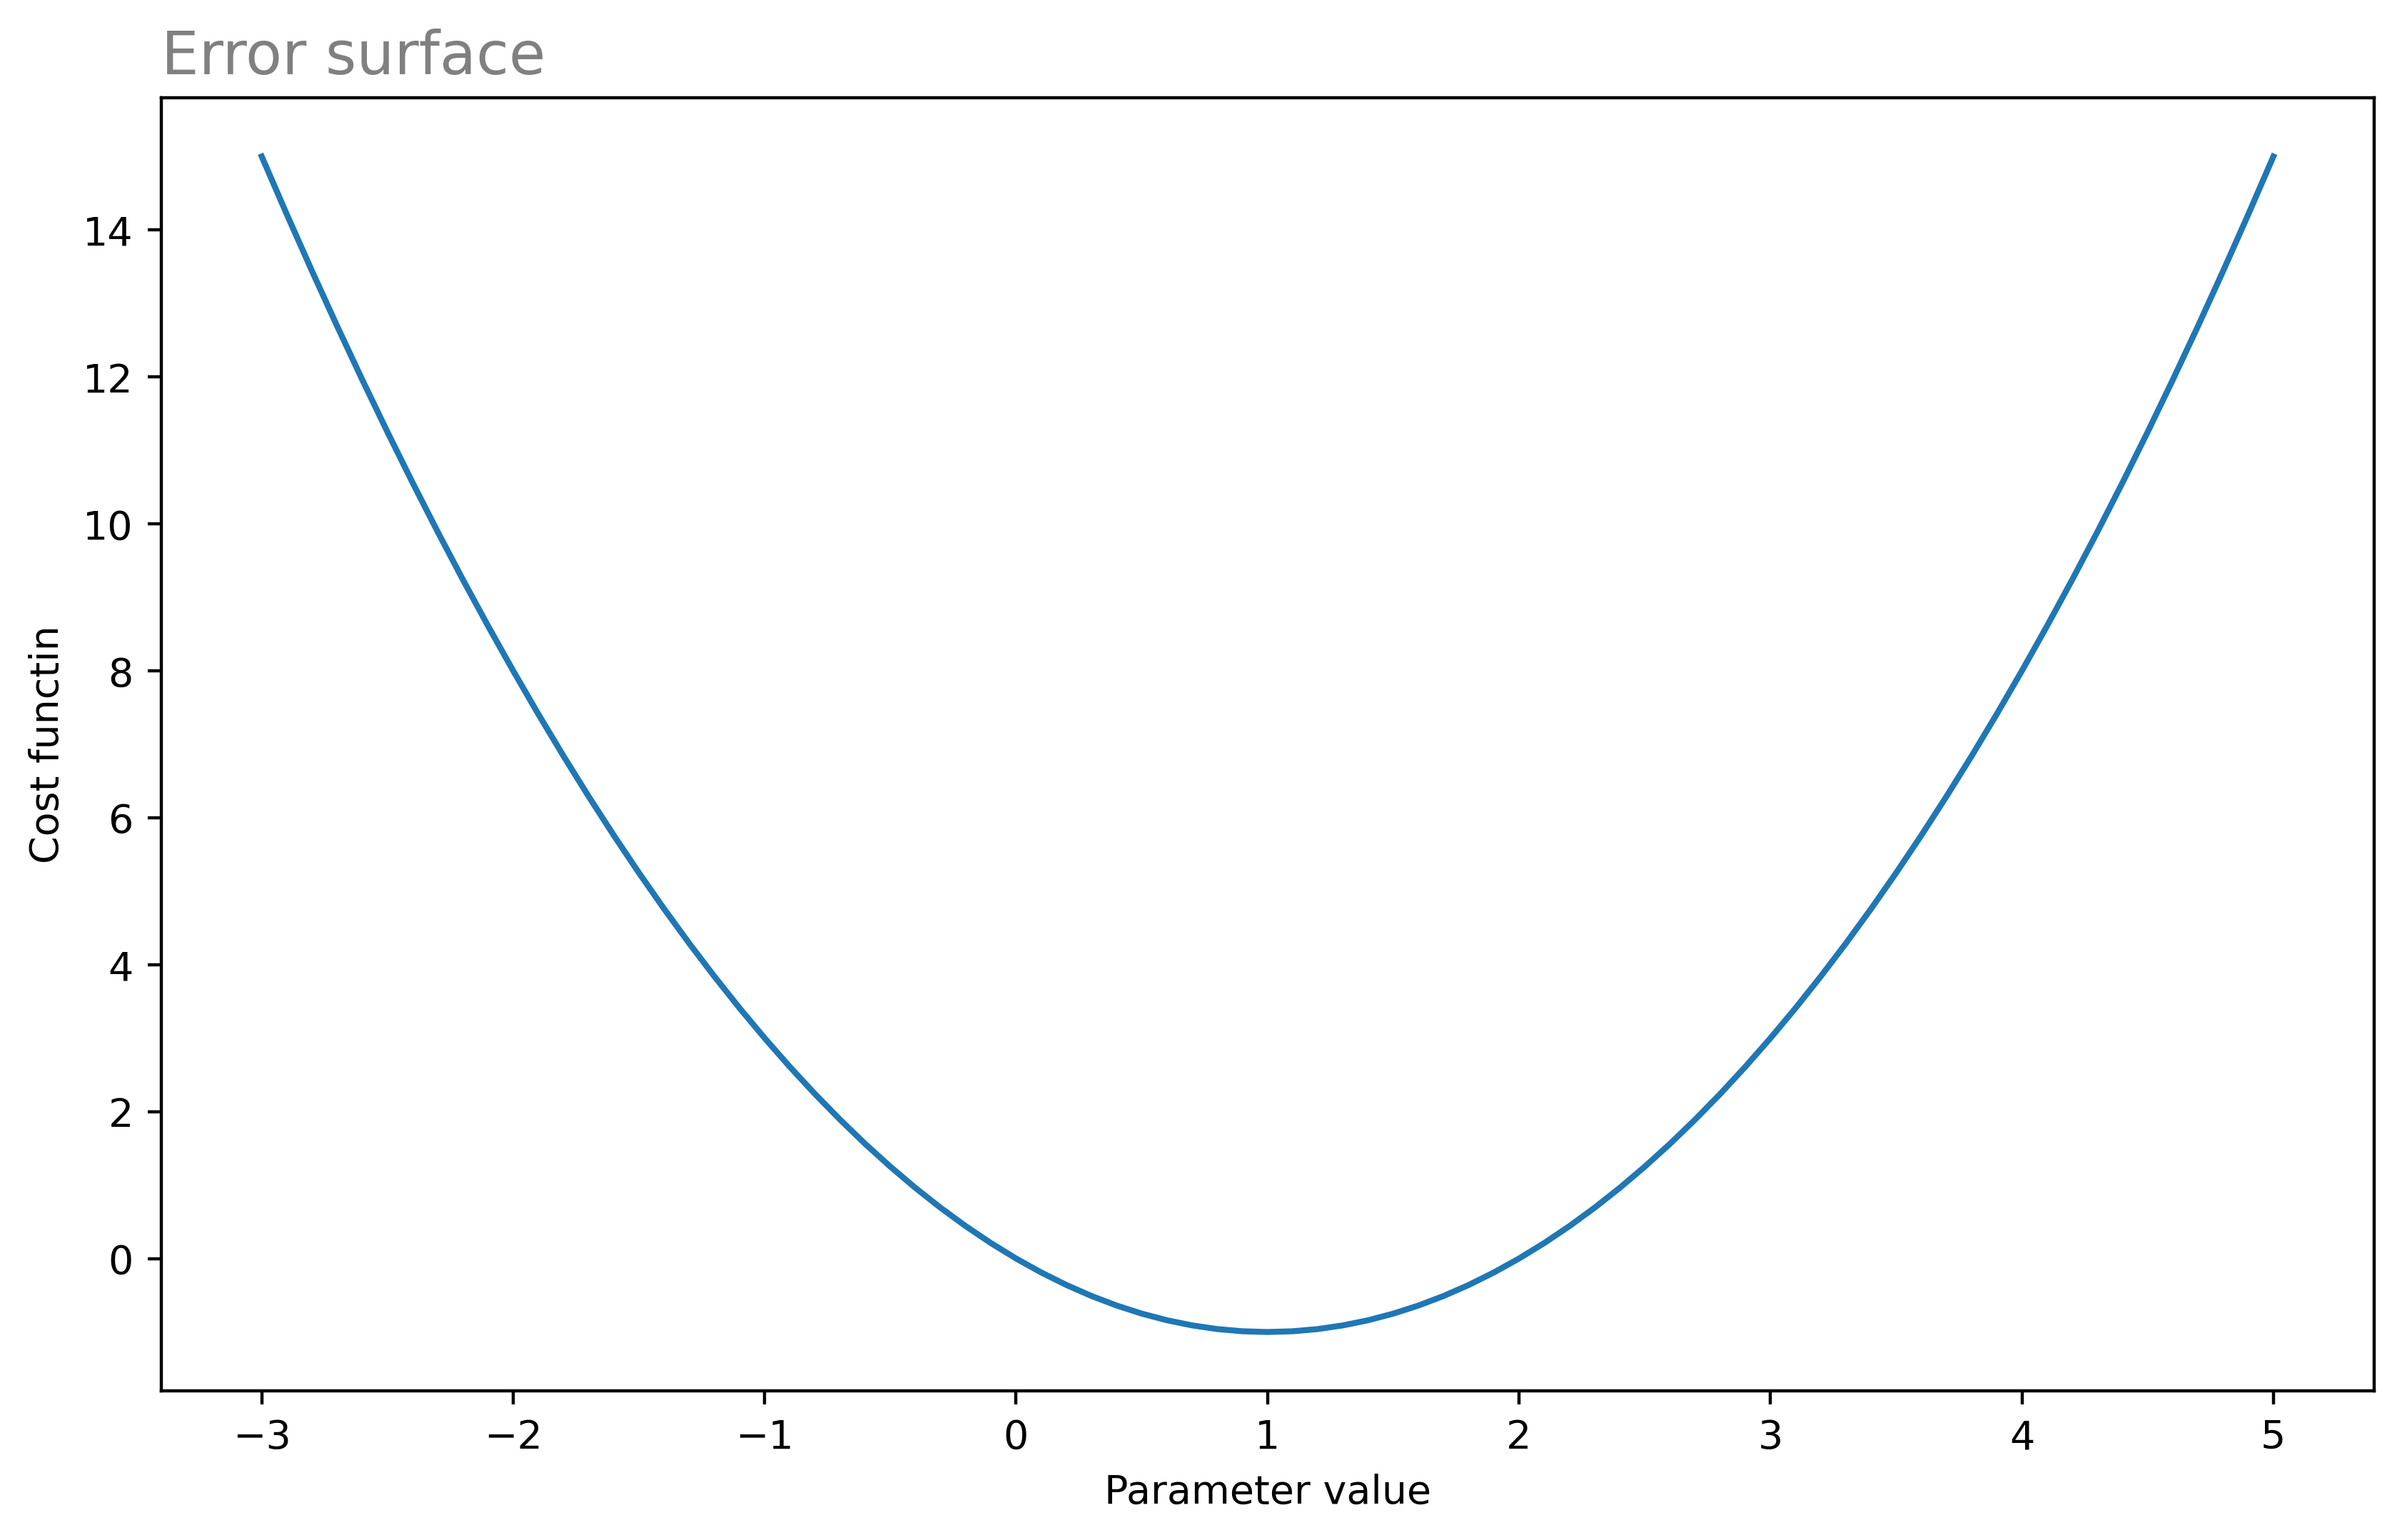

In [17]:
def cost_function(X):
    return X * (X-2)

y_poly = cost_function(X_poly)

plt.plot(X_poly, y_poly)
plt.xlabel("Parameter value")
plt.ylabel("Cost functin")
plt.title("Error surface",
          loc= 'left',
          fontsize= 15)

In [18]:
def gradient(X):
    return (2*X) - 2
x_start = 4.5
learning_rate = 0.1
x_next = x_start - gradient(x_start)*learning_rate
x_next

3.8

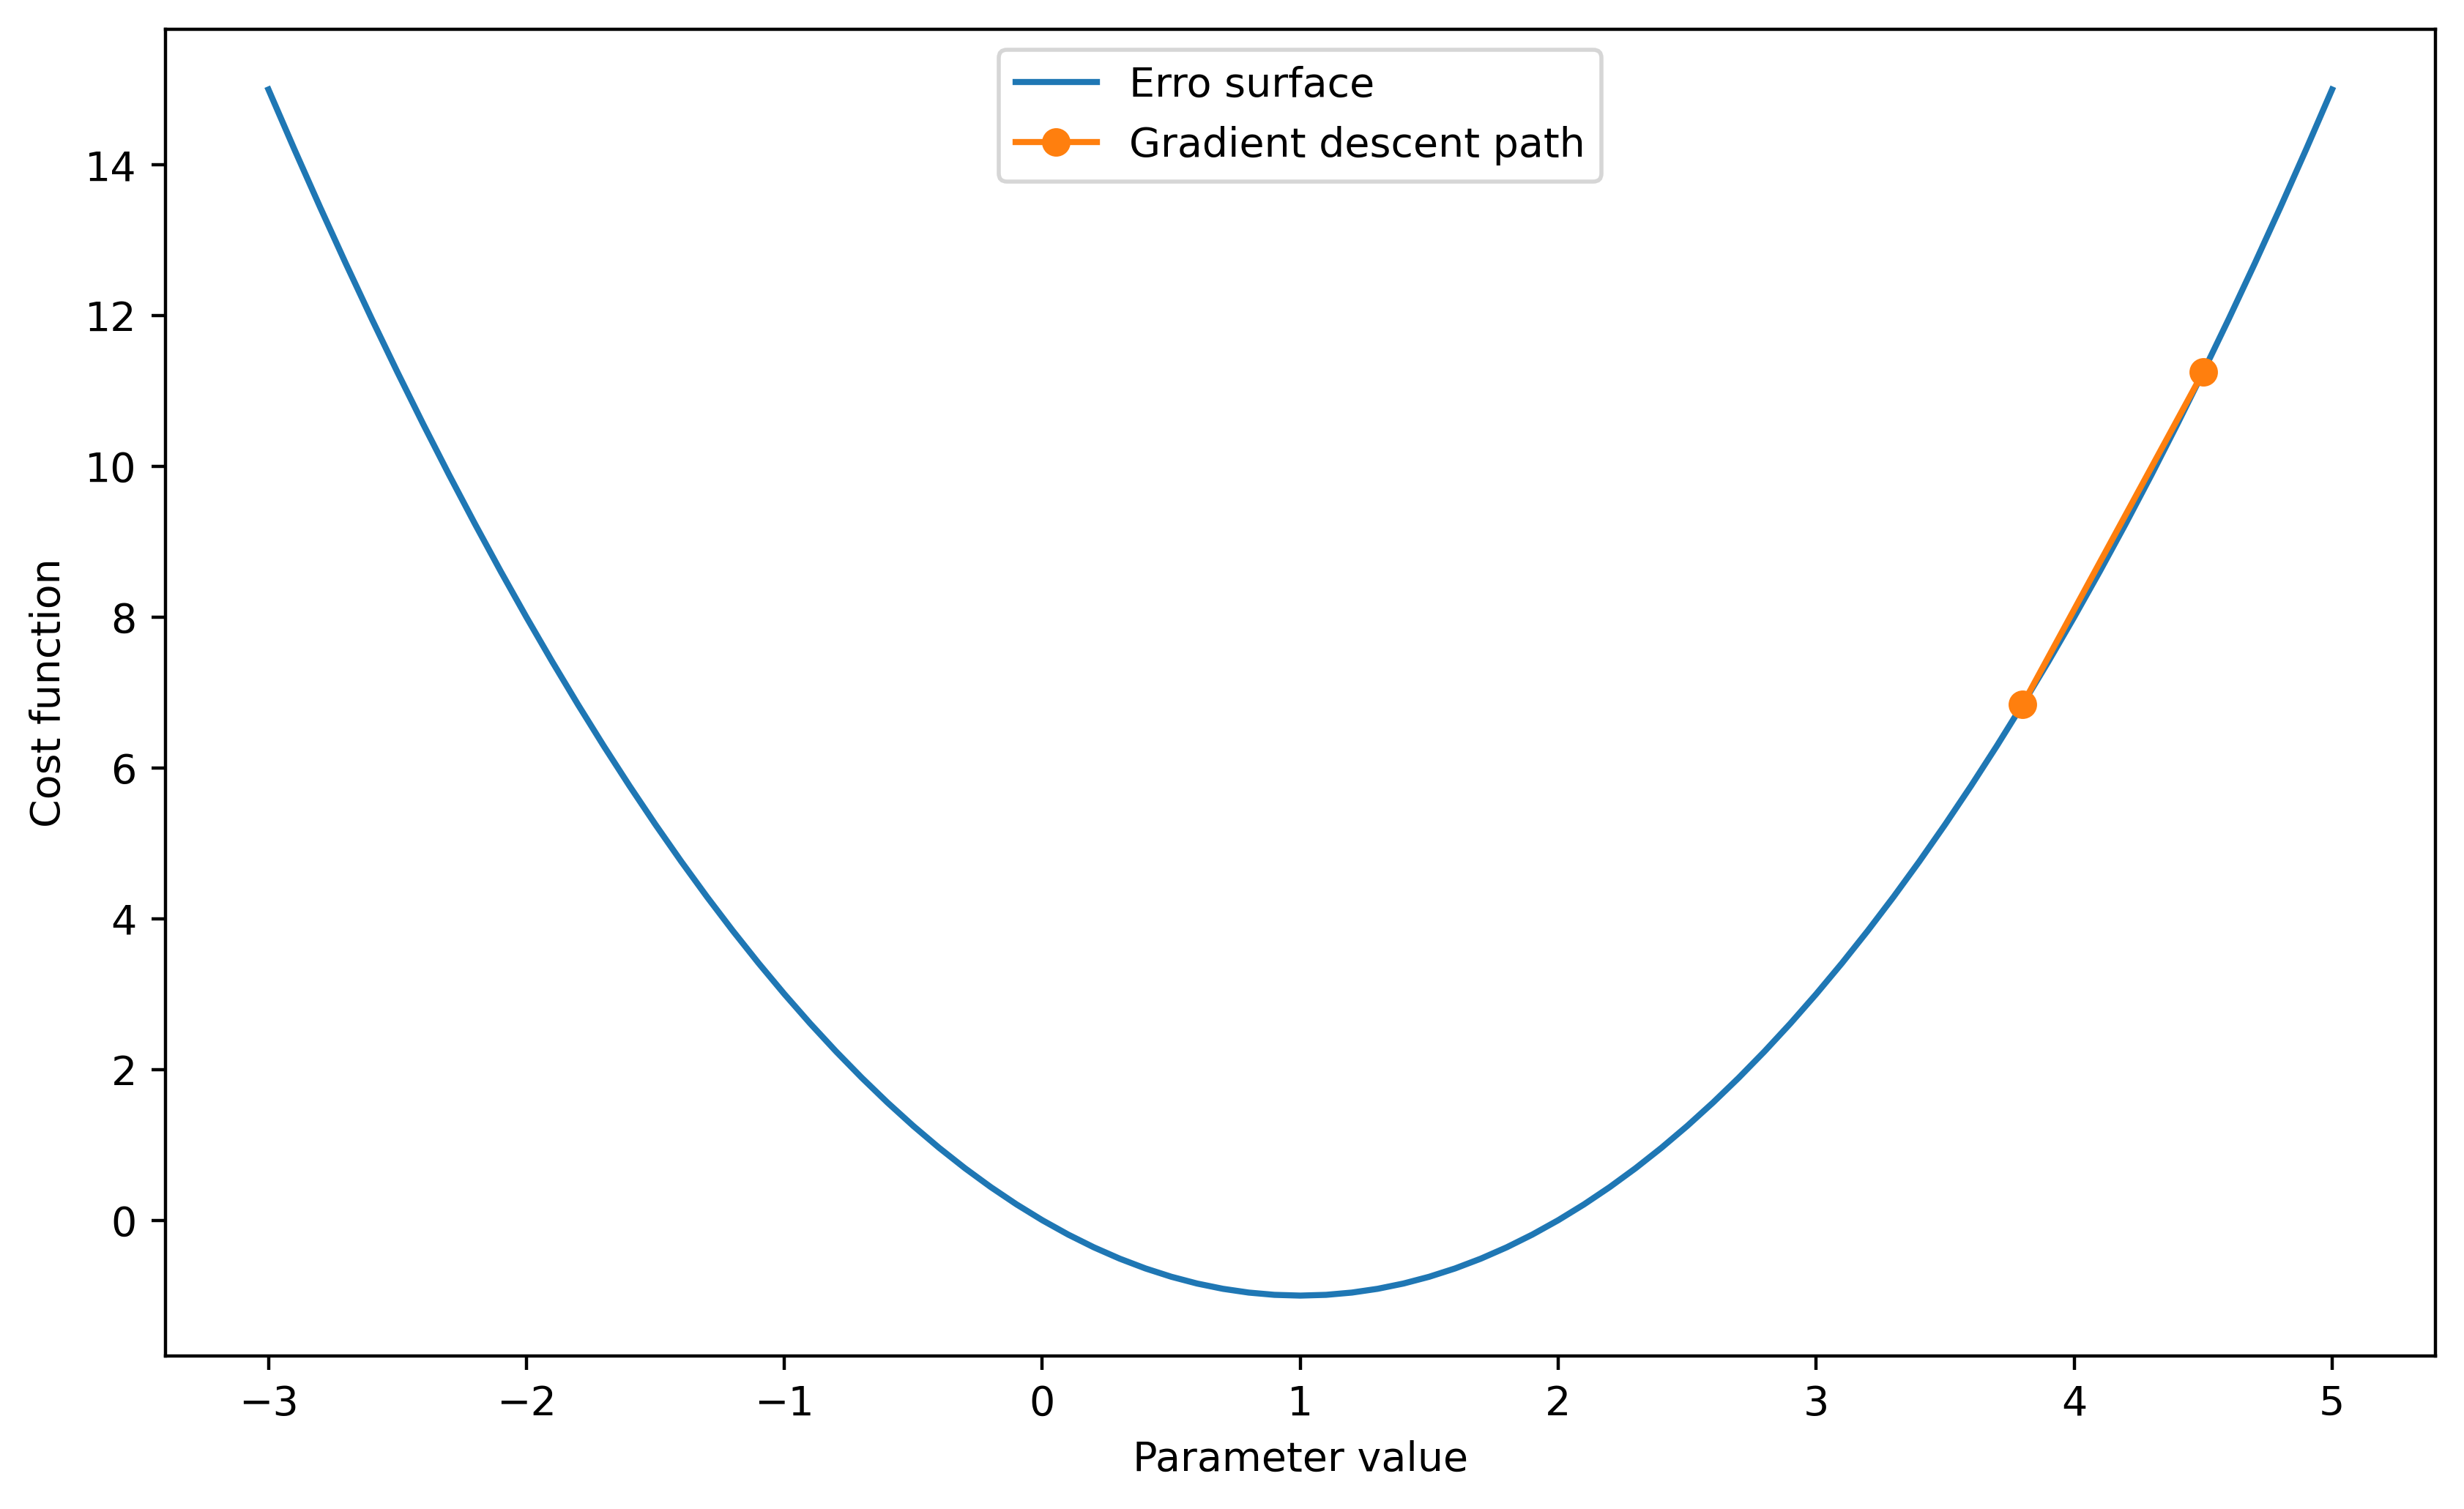

In [19]:
plt.plot(X_poly, y_poly)
plt.plot([x_start, x_next], 
         [cost_function(x_start), cost_function(x_next)],
         '-o')
plt.xlabel("Parameter value")
plt.ylabel("Cost function")
plt.legend(["Erro surface",
            "Gradient descent path"],
           loc= 'upper center')

In [20]:
iterations = 30
x_path = np.empty(iterations,)
x_path[0] = x_start

for iteration_count in range(1, iterations):
    derivative = gradient(x_path[iteration_count-1])
    x_path[iteration_count] = x_path[iteration_count-1] - (derivative*learning_rate)

x_path

array([4.5       , 3.8       , 3.24      , 2.792     , 2.4336    ,
       2.14688   , 1.917504  , 1.7340032 , 1.58720256, 1.46976205,
       1.37580964, 1.30064771, 1.24051817, 1.19241453, 1.15393163,
       1.1231453 , 1.09851624, 1.07881299, 1.06305039, 1.05044032,
       1.04035225, 1.0322818 , 1.02582544, 1.02066035, 1.01652828,
       1.01322263, 1.0105781 , 1.00846248, 1.00676998, 1.00541599])

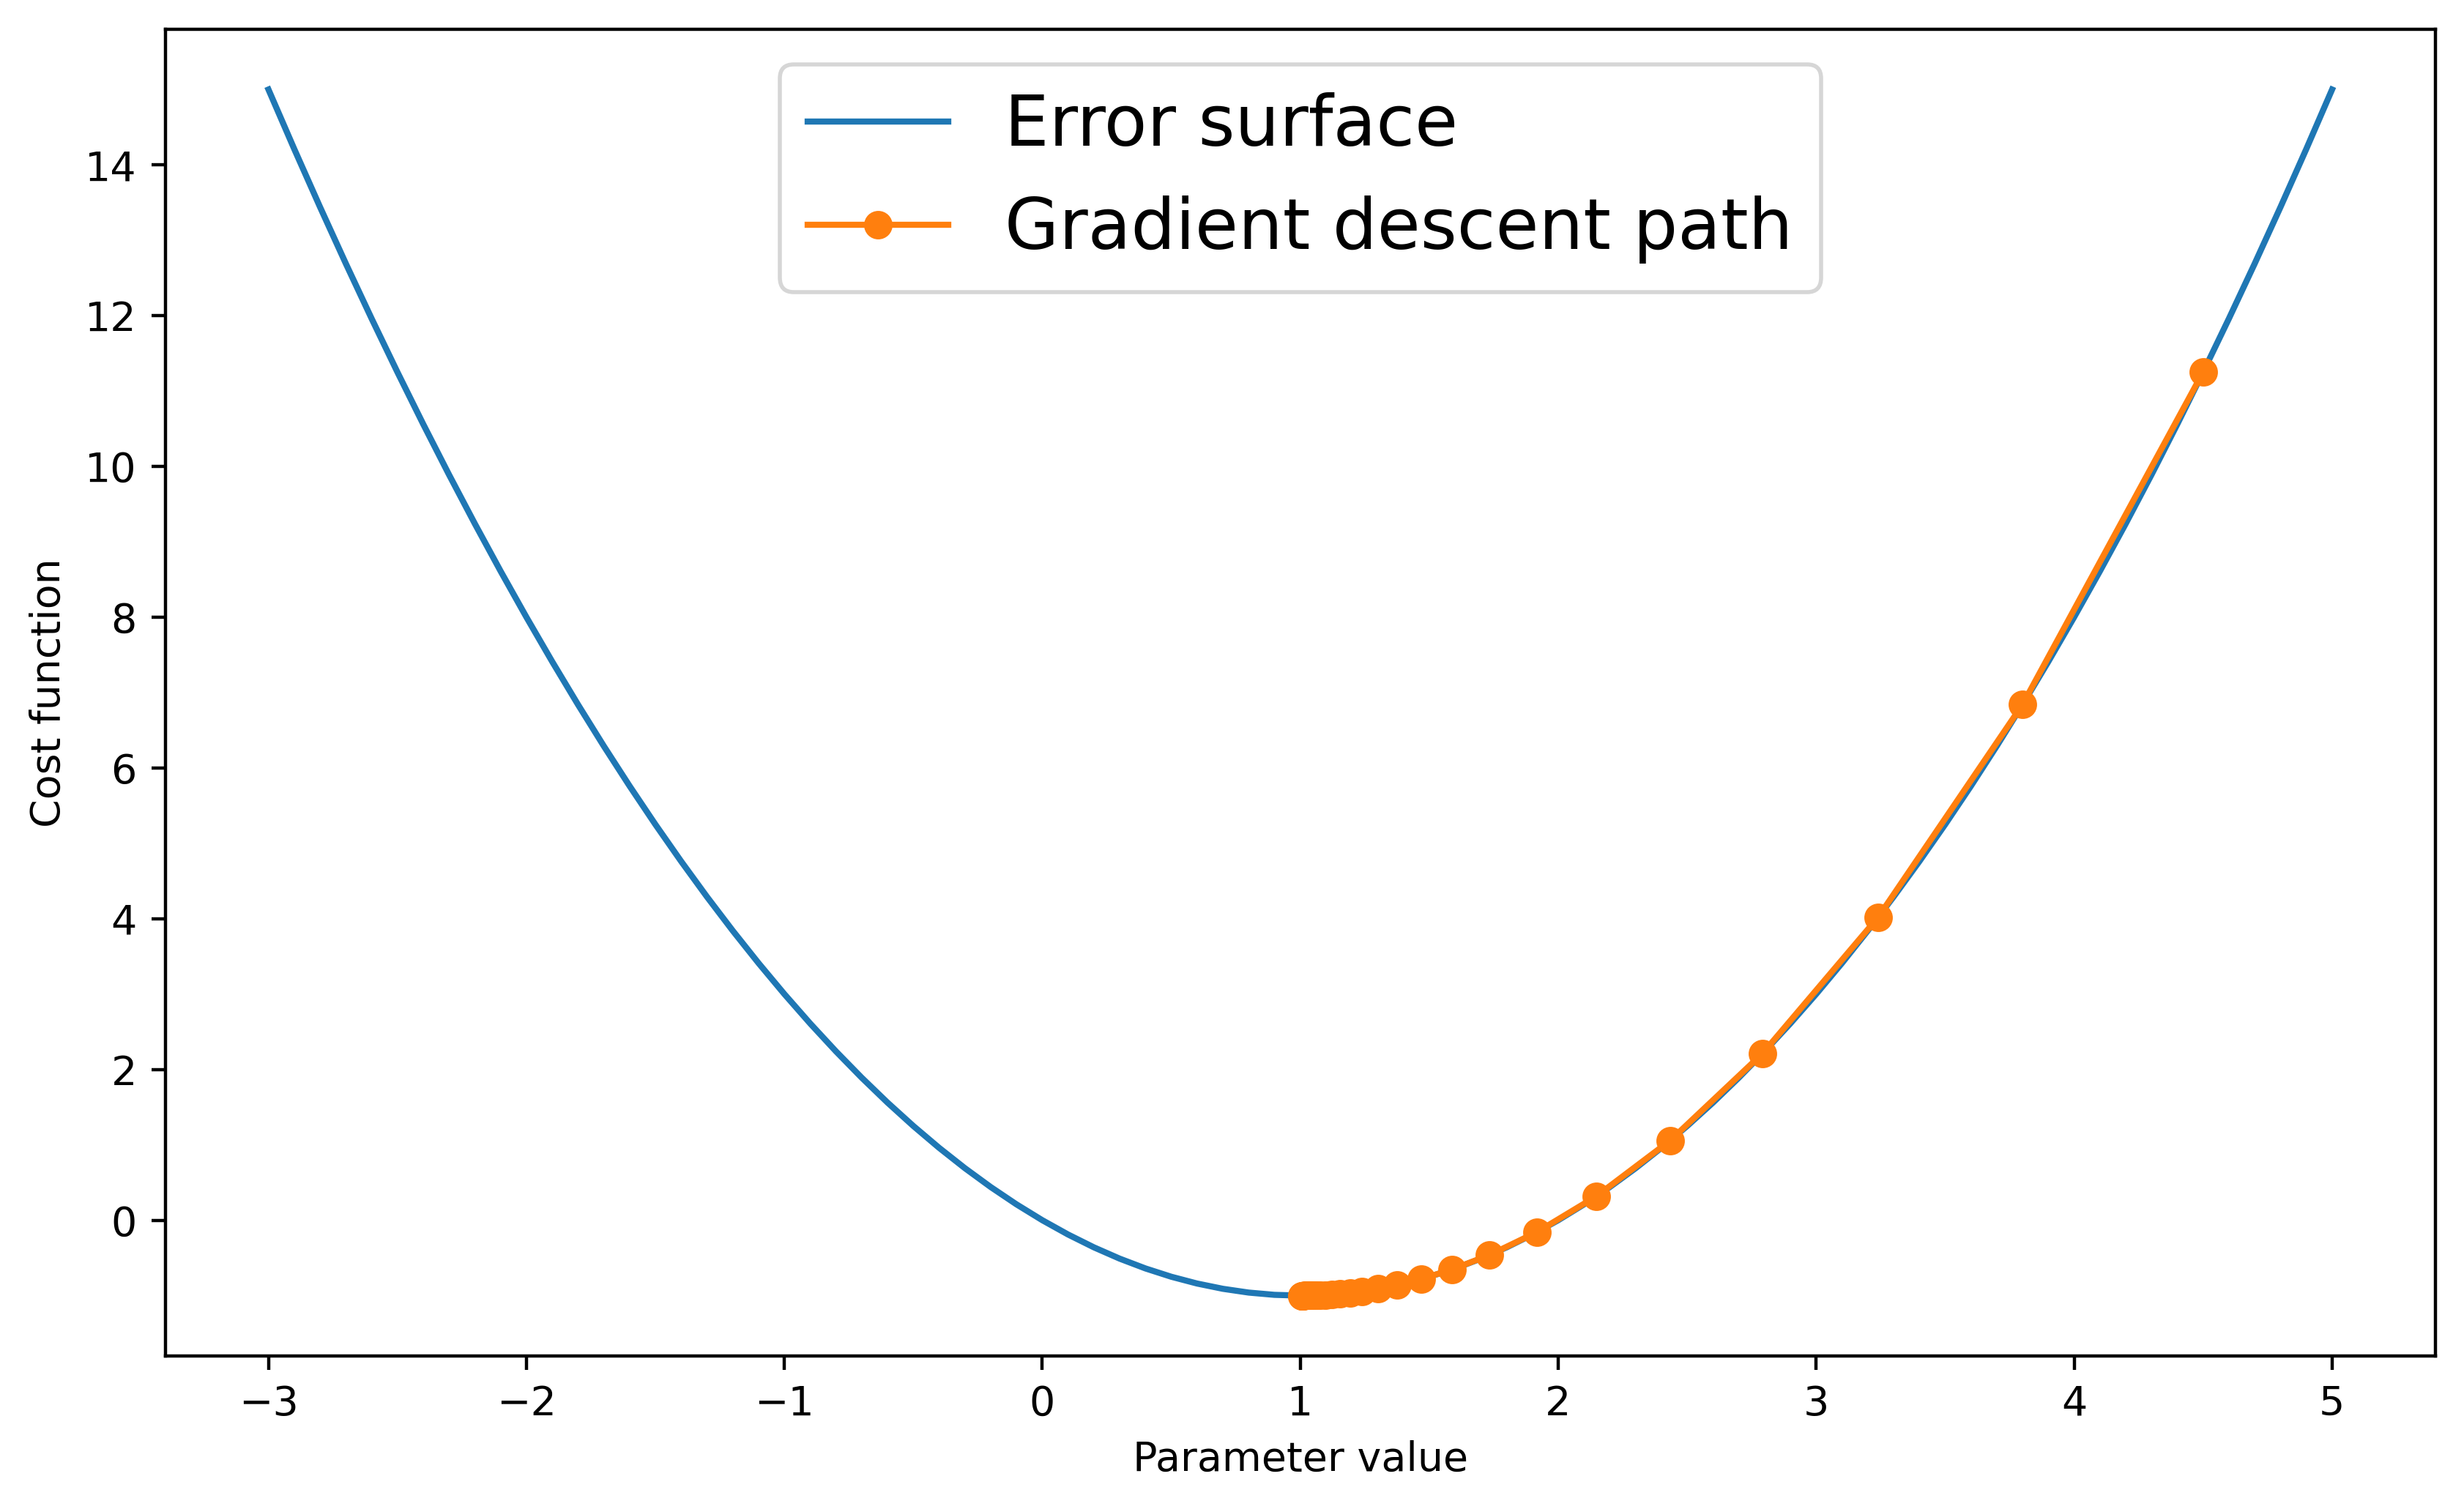

In [21]:
plt.plot(X_poly, y_poly)
plt.plot(x_path, 
         cost_function(x_path), 
         '-o')
plt.xlabel("Parameter value")
plt.ylabel("Cost function")
plt.legend(["Error surface",
           "Gradient descent path"],
           loc= 'upper center',
           fontsize= 'xx-large')

# plt.savefig('gradiente_decsendente.png',dpi= 400, format='png')

plt.show()

### Gerando e modelando dados de classificação sintéticos

In [22]:
from sklearn.preprocessing import scale
X_synthetic, y_synthetic = make_classification(n_samples= 1000,
                                                n_features= 200,
                                                n_informative= 3,
                                                n_redundant= 10,
                                                n_repeated= 0,
                                                n_classes= 2,
                                                n_clusters_per_class= 2,
                                                weights= None,
                                                flip_y= 0.01,
                                                class_sep= 0.8,
                                                hypercube= True,
                                                shift= 0,
                                                scale= 1,
                                                shuffle= True,
                                                random_state= 24)

print(X_synthetic.shape, y_synthetic.shape)

(1000, 200) (1000,)


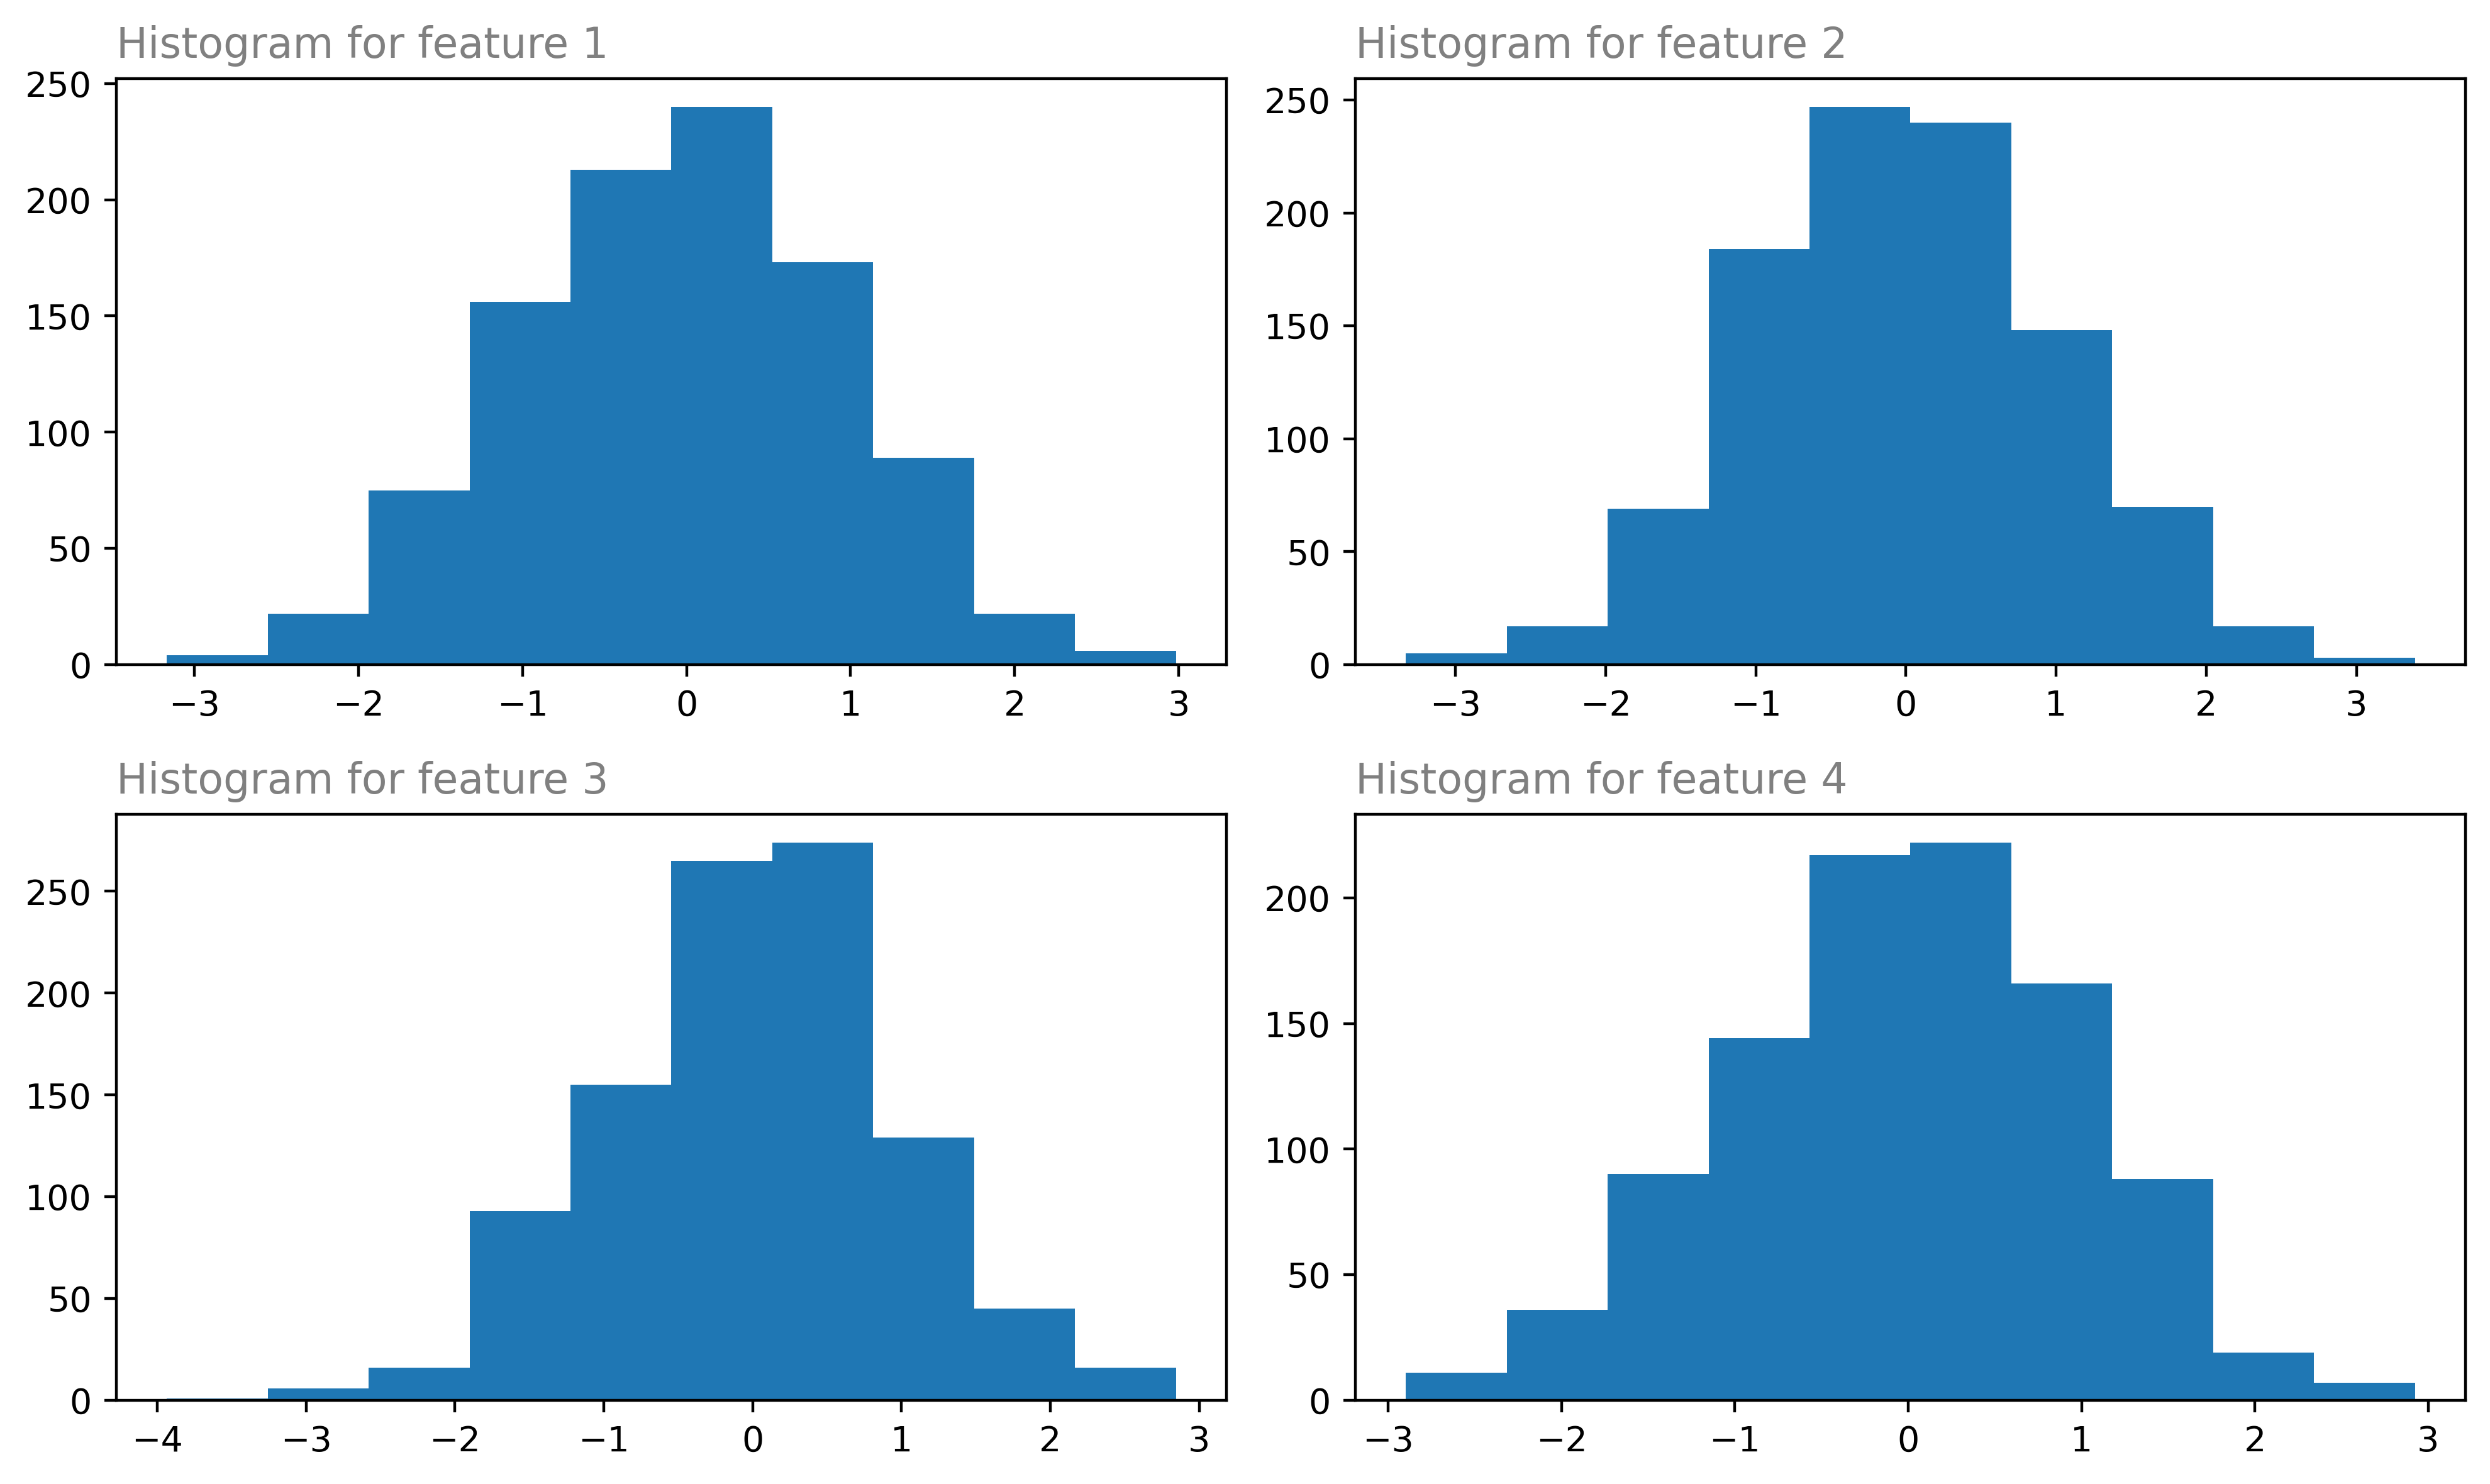

In [23]:
for plot_index in range(4):
    plt.subplot(2, 2, plot_index+1)
    plt.hist(X_synthetic[:, plot_index])
    plt.title(f"Histogram for feature {plot_index+1}",
              loc= 'left')

# plt.savefig('Análise de características e regularização', dpi= 200, format='png')

plt.tight_layout()

In [24]:
X_syn_train, X_syn_test, y_syn_train, y_syn_test = train_test_split(X_synthetic, y_synthetic,
                                                       test_size= 0.20,
                                                       random_state= 24)

lr_syn = LogisticRegression(solver= 'liblinear',
                            penalty= 'l1',
                            C= 1000,
                            random_state= 1)
lr_syn.fit(X_syn_test, y_syn_test)

LogisticRegression(C=1000, penalty='l1', random_state=1, solver='liblinear')

In [25]:
LogisticRegression(C= 1000,
                   class_weight= None,
                   dual= False,
                   fit_intercept= True,
                   intercept_scaling= 1,
                   max_iter= 100,
                   multi_class= 'warn',
                   n_jobs= None,
                   penalty= 'l1',
                   random_state= 1,
                   solver= 'liblinear',
                   tol= 0.0001,
                   verbose= 0,
                   warm_start= False)

LogisticRegression(C=1000, multi_class='warn', penalty='l1', random_state=1,
                   solver='liblinear')

In [28]:
y_syn_train_predict_proba = lr_syn.predict_proba(X_syn_train)
roc_auc_score(y_syn_train, y_syn_train_predict_proba[:,1])

0.7441437500000001